In [19]:
import pandas as pd
import sqlite3

In [20]:
# Load CSV files into DataFrames
df1 = pd.read_csv('../Outputs/efficient_net_b7_model.csv')
df2 = pd.read_csv('../Outputs/inception_res_net_v2_model.csv')
df3 = pd.read_csv('../Outputs/mobile_net_model.csv')
df4 = pd.read_csv('../Outputs/vgg19_model.csv')
df5 = pd.read_csv('../Outputs/xception_model.csv')


In [21]:
# Create an SQLite database (in memory)
conn = sqlite3.connect(':memory:')

In [22]:
# Load DataFrames into SQLite tables
df1.to_sql('table1', conn, index=False, if_exists='replace')
df2.to_sql('table2', conn, index=False, if_exists='replace')
df3.to_sql('table3', conn, index=False, if_exists='replace')
df4.to_sql('table4', conn, index=False, if_exists='replace')
df5.to_sql('table5', conn, index=False, if_exists='replace')

5

In [23]:
# Write the SQL query to join the tables
query = '''
SELECT 
    t1.*, t2.*
FROM 
    table1 AS t1
JOIN 
    table2 AS t2
ON 
    t1.breed = t2.breed
'''

In [24]:
# Execute the SQL query and fetch the results into a DataFrame
result_df = pd.read_sql_query(query, conn)


In [25]:
# showing the results for efficient_net_b7_model.csv and inception_res_net_v2_model.csv
result_df.columns=['breed', 'prediction_ENB7', 'breed', 'prediction_INRV2']
result_df.head()

,breed,prediction_ENB7,breed,prediction_INRV2
0,Yorkshire_terrier,0.707574,Yorkshire_terrier,0.790774
1,Australian_terrier,0.049668,Australian_terrier,0.026721
2,silky_terrier,0.046728,silky_terrier,0.035807
3,toy_terrier,0.012989,toy_terrier,0.012485


In [26]:
# # renaming columns for clarification purposes
# result_df.columns.values[1] = 'predictions_ENB7'
# result_df.columns.values[3] = 'predictions_IRNV2'
# result_df.head()

In [27]:
# joining more tables xception model and vgg19 model
query = '''
SELECT 
    t4.*, t5.*
FROM 
    table4 AS t4
JOIN 
    table5 AS t5
ON 
    t4.breed = t5.breed
'''
result_df = pd.read_sql_query(query, conn)
# result_df.head()

In [28]:
result_df.columns= ['breed', 'prediction_vgg19', 'breed', 'prediction_xception']
result_df.head()

,breed,prediction_vgg19,breed,prediction_xception
0,Yorkshire_terrier,0.946526,Yorkshire_terrier,0.805754
1,silky_terrier,0.027001,silky_terrier,0.047730
2,Australian_terrier,0.016599,Australian_terrier,0.021494
3,toy_terrier,0.004414,toy_terrier,0.010525
4,Norfolk_terrier,0.001563,Norfolk_terrier,0.004215


In [29]:
# trying a different approach to join all of the tables together
csv_paths= [
    '../Outputs/efficient_net_b7_model.csv',
    '../Outputs/inception_res_net_v2_model.csv',
    '../Outputs/mobile_net_model.csv',
    '../Outputs/vgg19_model.csv',
    '../Outputs/xception_model.csv'
]
dataframes = [pd.read_csv(file)for file in csv_paths]

combo_df = pd.concat(dataframes, ignore_index=True, sort=False)
combo_df


,breed,prediction
0,Yorkshire_terrier,0.707574
1,Australian_terrier,0.049668
2,silky_terrier,0.046728
3,toy_terrier,0.012989
4,Maltese_dog,0.005984
5,Yorkshire_terrier,0.790774
6,silky_terrier,0.035807
7,Australian_terrier,0.026721
8,toy_terrier,0.012485
9,Lakeland_terrier,0.001828


In [30]:
data = {
    'Model_Name': ["Efficient_Net_B7", "Inception_Res_Net_V2", 'Mobile_Net', 'VGG19', 'Xception'],
    'Breed': ['Yorkshire_terrier','Yorkshire_terrier','Yorkshire_terrier','Yorkshire_terrier','Yorkshire_terrier'],
    'Accuracy': [0.707, 0.790, 0.970, 0.946, 0.805]
}
data_df = pd.DataFrame(data)
data_df


,Model_Name,Breed,Accuracy
0,Efficient_Net_B7,Yorkshire_terrier,0.707
1,Inception_Res_Net_V2,Yorkshire_terrier,0.790
2,Mobile_Net,Yorkshire_terrier,0.970
3,VGG19,Yorkshire_terrier,0.946
4,Xception,Yorkshire_terrier,0.805


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


Photo saved succesfully


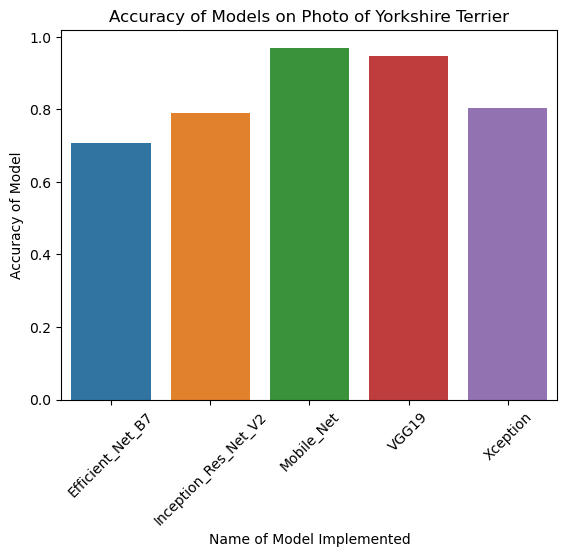

In [32]:
sns.barplot(x='Model_Name', y='Accuracy', data = data_df)
plt.title('Accuracy of Models on Photo of Yorkshire Terrier')
plt.xlabel('Name of Model Implemented')
plt.ylabel('Accuracy of Model')
plt.xticks(rotation=45)
plt.savefig('../Outputs/accuracy_graph', dpi=300, bbox_inches='tight')
print(f'Photo saved succesfully')
plt.show()

In [40]:
# finding overall average winning model over samples of three photos 

# efficient net B7 models
enb7 = [56,71,79]
enb7_final = sum(enb7)/len(enb7)
print(f'The average overall score for the Efficient Net B7 model was {enb7_final:.2f}%')

# inception res net v2 model
irnfv2 = [79,79,90]
irnfv2_final = sum(irnfv2)/len(irnfv2)
print(f"The average overall score for the Inception Res Net model was {irnfv2_final:.2f}%")

# mobile net model
mobile_net = [62,97,99]
mobile_net_final = sum(mobile_net)/len(mobile_net)
print(f"The average overall score for the Mobile Net model was {mobile_net_final:.2f}%")

# VGG19 model
vgg19 = [61,94,80]
vgg19_final = sum(vgg19)/len(vgg19)
print(f"The average overall score for the VGG19 model was {vgg19_final:.2f}%")

# xception model
xception = [30,80,97]
xception_final = sum(xception)/ len(xception)
print(f"The average overall score for the Xception model was {xception_final:.2f}%")


The average overall score for the Efficient Net B7 model was 68.67%
The average overall score for the Inception Res Net model was 82.67%
The average overall score for the Mobile Net model was 86.00%
The average overall score for the VGG19 model was 78.33%
The average overall score for the Xception model was 69.00%


In [42]:
# building data frame from scratch to show over all scores 
avg_data = {
    'Name_of_Model': ['Efficient_Net_B7', 'Inception_Res_Net_V2', 'Mobile_Net', 'VGG19', 'Xception'],
    'Overall_Average_Accuracies': [68.67, 82.67, 86.00, 78.33, 69.00]
}
avg_data_df = pd.DataFrame(avg_data)
avg_data_df

,Name_of_Model,Overall_Average_Accuracies
0,Efficient_Net_B7,68.67
1,Inception_Res_Net_V2,82.67
2,Mobile_Net,86.00
3,VGG19,78.33
4,Xception,69.00


Photo saved succesfully


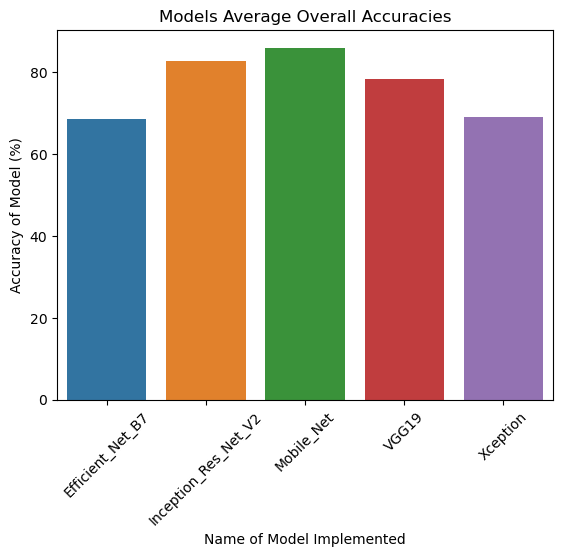

In [43]:
sns.barplot(x='Name_of_Model', y='Overall_Average_Accuracies', data = avg_data_df)
plt.title('Models Average Overall Accuracies')
plt.xlabel('Name of Model Implemented')
plt.ylabel('Accuracy of Model (%)')
plt.xticks(rotation=45)
plt.savefig('../Outputs/overall_accuracy_graph', dpi=300, bbox_inches='tight')
print(f'Photo saved succesfully')
plt.show()

In [45]:
# close the database connection
conn.close()